# Практическая работа №1: Основы анализа и моделирования социальных сетей

Выполнила студентка гр. 3385 Дорогушина Анастасия Александровна. Вариант №4.

## Цель работы

Овладеть навыками работы с математическими пакетами для моделирования, визуализации и анализа социальных сетей.


## Основные теоретические положения

### Основные определения

#### Актор
Актор (actor) - базовый элемент сети, представляющий отдельную единицу, (не обязательно) участвующую во взаимодействиях.

#### Реляционная связь
Реляционная связь (relational tie) - отношение/взаимодействие/ассоциация между двумя акторами в сети.

#### Граф
Граф (graph) - модель социальной сети с ненаправленным дихотомическим отношением $G = G(N,L)$, где:
- $N = {n_1,...,n_g}$ - набор акторов;
- $L = {l_1,...,l_L}$, $l_k = (n_i,n_j)$ - набор ребер.

#### Социоматрица
Социоматрица (sociomatrix) - матрица $X$ размерности $g \times g$, описывающая смежные узлы в сети ($g$ - количество акторов в сети). $X = x_{ij}, 1 \le i,j \le g$, т.ч.
- на диагонали $x_{ii} = -$;
- в остальных  $x_{ij} = 0$ или  $x_{ij} = 1$.

#### Список ребер
Представление сети в виде множества упорядоченных пар $E = \{(i,j) | x_{ij} = 1\}$

#### Размер сети
Резмер сети (network size) - количество акторов в сети.

#### Плотность сети
Плотность сети (network density) - доля имеющихся связей по отношению к максимально возможному количеству связей:

$$den(G) = \frac{2L}{g(g-1)} = \frac{L}{\binom{g}{2}}$$

#### Компонента связности
Компонента связности (component) - подгруппа, в которой все акторы связаны друг с другом.

#### Диаметр сети
Диаметр сети (network diameter) - максимальное расстояние между 2 узлами в сети:
$$diam(G) = \max d(n_i,n_j)$$

- $d_{ij}$ - длина кратчайшего пути между вершинами $i$ и $j$.

#### Коэффициент кластеризации
Глобальный коэффициент кластеризации - мера, которая характеризует степень треугольности в сети:

$$cl_T(G) = \frac{3*T_1(G)}{T(G)}$$
- $T_1$ - число закрытых треугольников;
- $T$ - число открытых и закрытых треугольников.

Локальный коэффициент кластеризации $cl_i$ для вершины $i$ графа G:

$$cl(n_i) = \frac{2N_i}{k_i(k_i-1)}$$

- $N_i$ - число ребер, связывающих смежные узлы между собой;
- $k_i$ - число смежных узлов.


### Алгоритмы визуализации сетей

#### Фрюхтерман-Рейнгольд
Основан на физической аналогии:
- Идея - моделирование как физические частицы и пружины

- Цель - найти такое расположение, чтобы система была в равновесии

- Алгоритм работает итеративно, в каждой итерации расчет, перемещение и охлаждение, пока граф не "застывает"

- В алгоритме действуют сила отталкивания и сила притяжения.

#### Камада-Каваи
Минимизирует разницу между геодезическими и евклидовыми расстояниями:
- Цель (целевое расстояние) - рассчитывается через кратчайший путь и диаметр
$$\frac{L d(u,v)}{diam}$$

- Вместо охлаждения минимизация энергии

- Итеративно на каждом шаге выбирается узел с наибольшим вкладом в энергию и сдвигается, уменьшая энергию, пока та не стабилизирована
$$E = \sum_{u \neq v} (\frac{||p_u - p_v||}{d_{uv}} - 1)^2$$

### Меры центральности

#### Центральность по степени

$$C_D(n_i) = deg(n_i)$$

Нормированная центральность по степени:

$$C_D'(n_i) = \frac{deg(n_i)}{g - 1}$$

#### Центральность по близости
$$C_C(n_i) = \frac{1}{\sum_{j = 1}^{g} d(n_i,n_j)}$$

Нормированная центральность по близости:

$$C_C'(n_i) = (g-1)C_C(n_i)$$

#### Центральность по посредничеству
$$C_B(n_i) = \sum_{j < k} \frac{\sigma_{jk}(n_i)}{\sigma_{jk}}$$

- $\sigma_{jk}$ - количество кратчайших путей между $j$ и $k$
- $\sigma_{jk}(n_i)$ - количество таких путей, содержащих $n_i

Нормированная центральность по посредничеству:

$$C_B'(n_i) =\frac{2 C_B(n_i)}{(g-1)(g-2)} = \frac{C_B(n_i)}{\binom{g-1}{2}}$$

#### Центральность по информации

Алгоритм нахождения:
1) Вычислить матрицу псевдосмежности $A = 1 + K$, где $K$ - матрица Кирхгофа $g \times g$
2) Вычислить обратную матрицу $A^{-1} = C$
3) $T = Tr(C)$, $R = \sum_{j = 1}^{g} c_{ij}$

Тогда центральность по информации:

$$C_I(n_i) = \frac{1}{c_{ii} + (T-2R)/g}$$

Нормированная центральность по информации:

$$C_I'(n_i) = \frac{C_I(n_i)}{\sum_{j = 1}^{g} C_I(n_j)}$$


### Нормированные меры престижа для ориентированных сетей

#### Престиж по степени
$$P_D(n_i) = deg_i(n_i)$$
$$P_D'(n_i) = \frac{deg_i(n_i)}{g-1}$$

#### Престиж по близости
$$P_P(n_i) = \frac{|I_i|}{g-1} \cdot \frac{|I_i|}{\sum d(n_i,n_j)}$$
- $|I_i|$ — множество акторов, достижимых для $n_i$

#### Престиж по рангу
Решается система уравнений:
$$\left(\frac{1}{a}E - X^T\right)P_R = x$$
- $X$ — социоматрица
- $a = \frac{1}{\lambda_1}$, где $\lambda_1$ — максимальное собственное значение матрицы $X$  
- $x$ — вектор сумм столбцов  
- $E$ — единичная матрица  

Нормировка:
$$P_R'(n_i) = \frac{P_R(n_i)}{m}$$
- $ m = \sum_{j = 1}^{g-1} a^kA^k_{g-1}$
- размер сети велик => $m = (g-1)! \cdot a^{g-1} \cdot e^{\frac{1}{a}}$


## Постановка задачи

С помощью математических пакетов и соответствующих библиотек провести анализ заданных социальных сетей вычислить описательные характеристики. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

###1. Извлечение социоматрицы

In [122]:
# сначала добавление нужных библиотек
if (!require(statnet)) install.packages("statnet", repos = "https://cloud.r-project.org/")
if (!require(igraph)) install.packages("igraph", repos = "https://cloud.r-project.org/")

Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:sna’:

    betweenness, bonpow, closeness, components, degree, dyad.census,
    evcent, hierarchy, is.connected, neighborhood, triad.census


The following objects are masked from ‘package:network’:

    %c%, %s%, add.edges, add.vertices, delete.edges, delete.vertices,
    get.edge.attribute, get.edges, get.vertex.attribute, is.bipartite,
    is.directed, list.edge.attributes, list.vertex.attributes,
    set.edge.attribute, set.vertex.attribute


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [123]:
library(statnet)
library(igraph)

In [124]:
# извлечение социоматрицы из файла

# florentine_marital.csv
link <- "https://drive.google.com/uc?export=download&id=13LxnbmPxmA-4WJTUK55hkCTYAZ9CtZUv"

# (ссылка, пропуск первой строки с именами, пропуск комментариев, разделитель столбцов, запрет изменения текстовых столбцов)
data <- read.csv(link, header = FALSE, comment = "#", sep = ",", stringsAsFactors = FALSE)

# матрица без первой строки
temp_matrix <- data[-1, ]

# социоматрица
sociomatrix <- matrix(as.numeric(unlist(temp_matrix)), nrow = nrow(temp_matrix), ncol = ncol(temp_matrix))
cat("Полученная социоматрица:\n\n")
print(sociomatrix)

Полученная социоматрица:

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
 [1,]    0    0    0    0    0    0    0    0    1     0     0     0     0
 [2,]    0    0    0    0    0    1    1    0    1     0     0     0     0
 [3,]    0    0    0    0    1    0    0    0    1     0     0     0     0
 [4,]    0    0    0    0    0    0    1    0    0     0     1     0     0
 [5,]    0    0    1    0    0    0    0    0    0     0     1     0     0
 [6,]    0    1    0    0    0    0    0    0    0     0     0     0     0
 [7,]    0    1    0    1    0    0    0    1    0     0     0     0     0
 [8,]    0    0    0    0    0    0    1    0    0     0     0     0     0
 [9,]    1    1    1    0    0    0    0    0    0     0     0     0     1
[10,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[11,]    0    0    0    1    1    0    0    0    0     0     0     0     0
[12,]    0    0    0    0    0    0    0    0    0     0     0     0     0

###2. Преобразование социоматрицы в список рёбер

In [125]:
# граф и список его ребер
g <- graph_from_adjacency_matrix(sociomatrix, mode = "undirected")
edge_list <- as_edgelist(g)

# вывод первых 5 ребер
cat("Первые 5 ребер:\n\n")
print(head(edge_list, 5))

Первые 5 ребер:

     [,1] [,2]
[1,]    1    9
[2,]    2    6
[3,]    2    7
[4,]    2    9
[5,]    3    5


###3. Присвоение имен столбцам и строкам социоматрицы

In [126]:
# присвоение имен
rownames(sociomatrix) <- data[1, ]
colnames(sociomatrix) <- data[1, ]

cat("Социоматрица с именами:\n\n")
print(sociomatrix)

Социоматрица с именами:

              Acciaiuoli  Albizzi  Barbadori  Bischeri  Castellani  Ginori
Acciaiuoli             0        0          0         0           0       0
 Albizzi               0        0          0         0           0       1
 Barbadori             0        0          0         0           1       0
 Bischeri              0        0          0         0           0       0
 Castellani            0        0          1         0           0       0
 Ginori                0        1          0         0           0       0
 Guadagni              0        1          0         1           0       0
 Lamberteschi          0        0          0         0           0       0
 Medici                1        1          1         0           0       0
 Pazzi                 0        0          0         0           0       0
 Peruzzi               0        0          0         1           1       0
 Pucci                 0        0          0         0           0       0


###4. Построение ненаправленной сети

In [127]:
# (исходная квадратная матрица, тип сети: ненаправленная)
inet <- graph_from_adjacency_matrix(sociomatrix, mode = "undirected")
# (исходная квадратная матрица, тип матрицы: матрица смежности, тип сети: ненаправленная)
inet1 <- network(as.matrix(sociomatrix), matrix.type = "adjacency", directed = FALSE)

###5. Отображение сети

Алгоритм Фрюхтермана-Рейнгольда:

Идея - моделирование как физические частицы и пружины

Цель - найти такое расположение, чтобы система была в равновесии

Алгоритм работает итеративно, в каждой итерации расчет, перемещение и охлаждение, пока граф не "застывает"

Алгоритм Камада-Каваи:

Цель (целевое расстояние) - рассчитывается через кратчайший путь и диаметр

Вместо охлаждения минимизация энергии

Итеративно на каждом шаге выбирается узел с наибольшим вкладом в энергию и сдвигается, уменьшая энергию, пока та не стабилизирована

В итоге укладка Фрюхтермана-Рейнгольда лучше показывает сообщества и более равномерна, укладка Камада-Каваи лучше показывает сеть глобально, сохраняет расстояния и метрику.

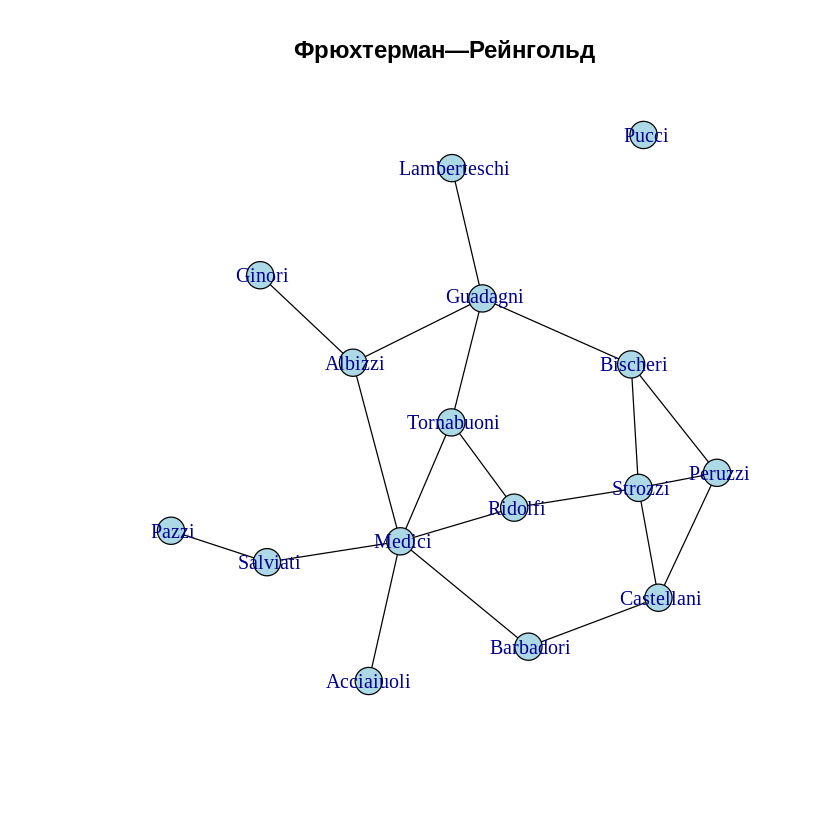

In [128]:
plot(inet, layout = layout_with_fr, vertex.size = 10, vertex.color = "lightblue", edge.color = "black", main = "Фрюхтерман—Рейнгольд")

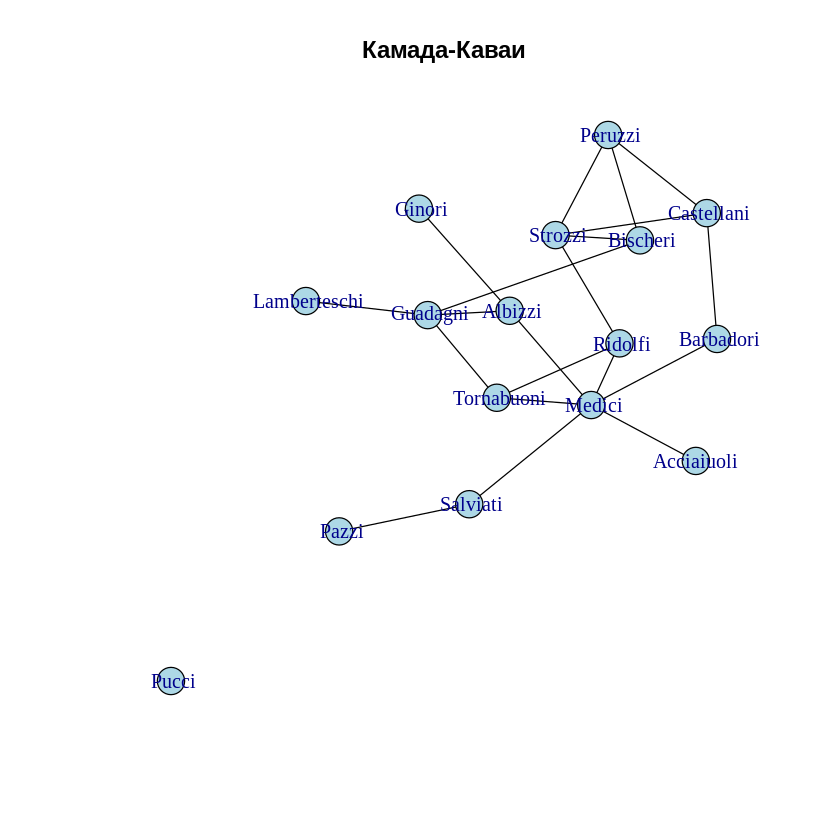

In [129]:
plot(inet, layout = layout_with_kk, vertex.size = 10, vertex.color = "lightblue", edge.color = "black", main = "Камада-Каваи")

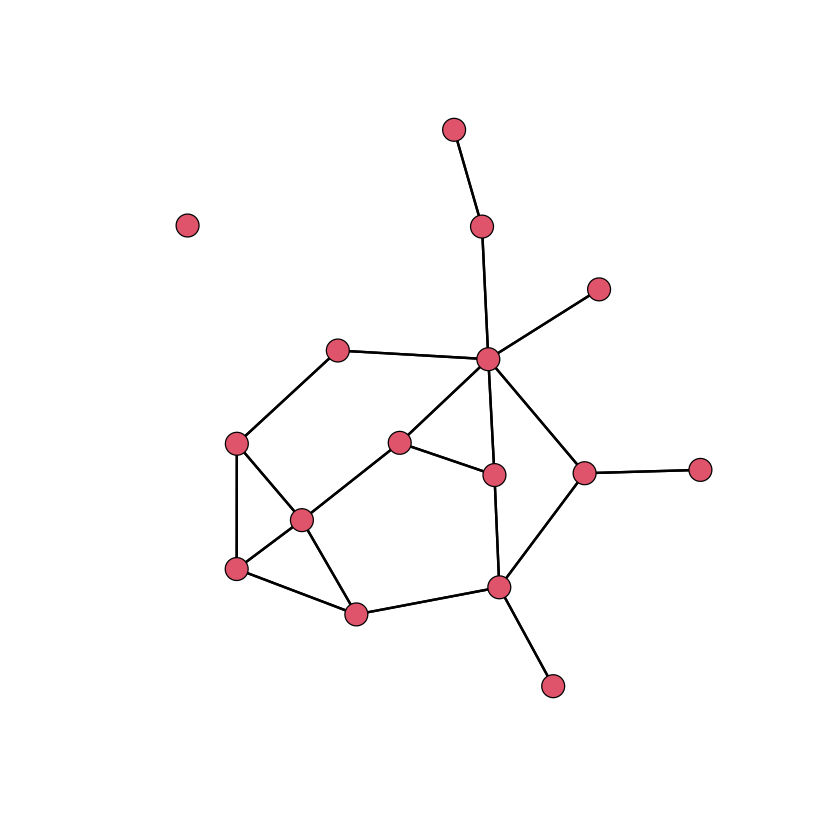

In [130]:
gplot(inet1, gmode = "graph", mode = "fruchtermanreingold")

###6. «Описательная сводка» сети

In [131]:
summary(inet1)

Network attributes:
  vertices = 16
  directed = FALSE
  hyper = FALSE
  loops = FALSE
  multiple = FALSE
  bipartite = FALSE
 total edges = 20 
   missing edges = 0 
   non-missing edges = 20 
 density = 0.1666667 

Vertex attributes:
  vertex.names:
   character valued attribute
   16 valid vertex names

No edge attributes

Network edgelist matrix:
      [,1] [,2]
 [1,]    9    1
 [2,]    6    2
 [3,]    7    2
 [4,]    9    2
 [5,]    5    3
 [6,]    9    3
 [7,]    7    4
 [8,]   11    4
 [9,]   15    4
[10,]   11    5
[11,]   15    5
[12,]    8    7
[13,]   16    7
[14,]   13    9
[15,]   14    9
[16,]   16    9
[17,]   14   10
[18,]   15   11
[19,]   15   13
[20,]   16   13

###7. «Пятичисловая сводка» сети:
(a) Вычислить размер сети.

(b) Вычислить плотность сети вручную и с помощью соответствующей функции. Сделать выводы.

(c) Определить число компонент в сети по графику. Подтвердить
свои догадки с помощью соответствующей функции. Сделать
выводы.

(d) Вычислить диаметр сети. Сделать выводы.

(e) Вычислить коэффициент кластеризации. Сделать выводы.


In [132]:
size_nw <- network.size(inet1)
cat("Размер сети:", size_nw, "\n\n")

cat("Плотность сети:\n")
den_g <- ecount(inet) * 2 / (size_nw * (size_nw - 1)) # 20*2/16*15 = 1/6
cat("Вручную по формуле", den_g, "\n")
cat("По функции", gden(inet1), "\n\n")

cat("Число компонент в сети:\n")
cat("По графику 2\n")
detach("package:igraph", unload = TRUE) # отключение библиотеки графов, чтобы не мешала функции components
cat("По функции", components(inet1), "\n\n")

lgc <- component.largest(inet1, result = "graph")
gd <- geodist(lgc)
cat("Диаметр сети:", max(gd$gdist), "\n\n")

cat("Коэффициент кластеризации:", gtrans(inet1, mode = "graph"))

Размер сети: 16 

Плотность сети:
Вручную по формуле 0.1666667 
По функции 0.1666667 

Число компонент в сети:
По графику 2
По функции 2 

Диаметр сети: 5 

Коэффициент кластеризации: 0.1914894

In [133]:
# Выводы:
## Плотность - 16,7% от всех возможных связей существуют
# Сеть не слишком плотная, а значит не выглядит в итоге как запутанное нагромождение
## Число компонент - 2 - сеть не является цельной, а разделена на две группы
# Между компонентами нет связей вообще, можно ассоциировать как две компании друзей, не общающихся друг с другом
## Диаметр сети - 5
# Если акторы находятся в одной компоненте, они связаны через 5 или менее "рукопожатий"
## Коэффициент кластеризации - 19,1% - низкая способность к дружбе втроем
# То есть если у актора есть два соседа, есть такая малая вероятность, что они связаны друг с другом
# Если у актора есть два друга, вряд ли они дружат между собой, этому актору лучше не оставлять их наедине

###8. Таблица для различных мер центральности

In [134]:
# убираем изолированную вершину Pucci
inet2 <- inet1
isolated_vert <- which(degree(inet1, gmode = "graph") == 0)
delete.vertices(inet2, isolated)
g <- network.size(inet2)

degree_c <- degree(inet2, gmode = "graph") / (g-1)
closeness_c <- closeness(inet2, gmode = "graph")
betweenness_c <- betweenness(inet2, gmode = "graph") * 2 / ((g-1)*(g-2))
info_c <- infocent(inet2, gmode = "graph")
information_c <- info_c/sum(info_c)

data.frame(
  n_i =  network.vertex.names(inet2),
  C_D = degree_c,
  C_C = closeness_c,
  C_B = betweenness_c,
  C_I = information_c
)

n_i,C_D,C_C,C_B,C_I
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Acciaiuoli,0.07142857,0.3684211,0.00000000,0.04943215
Albizzi,0.21428571,0.4827586,0.21245421,0.07408484
Barbadori,0.14285714,0.4375000,0.09340659,0.06816655
Bischeri,0.21428571,0.4000000,0.10439560,0.07427531
Castellani,0.21428571,0.3888889,0.05494505,0.07093098
Ginori,0.07142857,0.3333333,0.00000000,0.04309479
Guadagni,0.28571429,0.4666667,0.25457875,0.08190476
Lamberteschi,0.07142857,0.3255814,0.00000000,0.04562892
Medici,0.42857143,0.5600000,0.52197802,0.09502877


In [135]:
# Лидер сети - Medici по всем показателям:
## центральность по степени - 0.429 - вдвое больше ближайших конкурентов
## центральность по близости - 0.56 - находится ближе всех к остальным акторам
## центральность по посредничеству - 0.522 - более половины всех кратчайших путей
## центральность по информации - 0.095 - максимальная способность распространять информацию

# Достаточно влиятельные (достойные упоминания)
## Guadagni, Strozzi, Ridolfi, Tornabuoni
## центральность по степени - 0.214-0.286
## центральность по близости - 0.437-0.5

# Pazzi - наиболее изолированная из связанных семей
# Pucci - лидер по аутсайдерству

Выводы:

In [136]:
library(igraph)


Attaching package: ‘igraph’


The following objects are masked from ‘package:sna’:

    betweenness, bonpow, closeness, components, degree, dyad.census,
    evcent, hierarchy, is.connected, neighborhood, triad.census


The following objects are masked from ‘package:network’:

    %c%, %s%, add.edges, add.vertices, delete.edges, delete.vertices,
    get.edge.attribute, get.edges, get.vertex.attribute, is.bipartite,
    is.directed, list.edge.attributes, list.vertex.attributes,
    set.edge.attribute, set.vertex.attribute


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




###9. Задания 1-7 для ориентированного графа

In [137]:
# krackhardt_friendship.csv
link <- "https://drive.google.com/uc?export=download&id=15tvrZIu-OAJ5EtSgCoLwwsRR0MbtRSIe"

# (ссылка, пропуск комментариев, разделитель столбцов)
data <- read.csv(link, header = FALSE, comment = "#", sep = ",")

# социоматрица
sociomatrix <- matrix(as.numeric(unlist(data)), nrow = nrow(data), ncol = ncol(data))
cat("Полученная социоматрица:\n\n")
print(sociomatrix)

Полученная социоматрица:

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
 [1,]    0    1    0    1    0    0    0    1    0     0     0     1     0
 [2,]    1    0    0    0    0    0    0    0    0     0     0     0     0
 [3,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [4,]    1    1    0    0    0    0    0    1    0     0     0     1     0
 [5,]    0    1    0    0    0    0    0    0    1     0     1     0     0
 [6,]    0    1    0    0    0    0    1    0    1     0     0     1     0
 [7,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [8,]    0    0    0    1    0    0    0    0    0     0     0     0     0
 [9,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[10,]    0    0    1    0    1    0    0    1    1     0     0     1     0
[11,]    1    1    1    1    1    0    0    1    1     0     0     1     1
[12,]    1    0    0    1    0    0    0    0    0     0     0     0     0

In [138]:
# граф и список его ребер
g <- graph_from_adjacency_matrix(sociomatrix, mode = "directed")
edge_list <- as_edgelist(g)

# вывод первых 5 ребер
cat("Первые 5 ребер:\n\n")
print(head(edge_list, 5))

Первые 5 ребер:

     [,1] [,2]
[1,]    1    2
[2,]    1    4
[3,]    1    8
[4,]    1   12
[5,]    1   16


In [139]:
# присвоение имен (буквы английского алфавита)
rownames(sociomatrix) <- c("A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K",
                          "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U")
colnames(sociomatrix) <- c("A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K",
                          "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U")

cat("Социоматрица с именами:\n\n")
print(sociomatrix)

Социоматрица с именами:

  A B C D E F G H I J K L M N O P Q R S T U
A 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0
B 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
C 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
D 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0
E 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1
F 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1
G 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
H 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
I 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
J 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0
K 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0
L 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
M 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
N 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
O 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0
P 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
Q 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1
R 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
S 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0
T 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
U 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0


In [140]:
# (исходная квадратная матрица, тип сети: направленная)
inet <- graph_from_adjacency_matrix(sociomatrix, mode = "directed")
# (исходная квадратная матрица, тип матрицы: матрица смежности, тип сети: направленная)
inet1 <- network(as.matrix(sociomatrix), matrix.type = "adjacency", directed = TRUE)

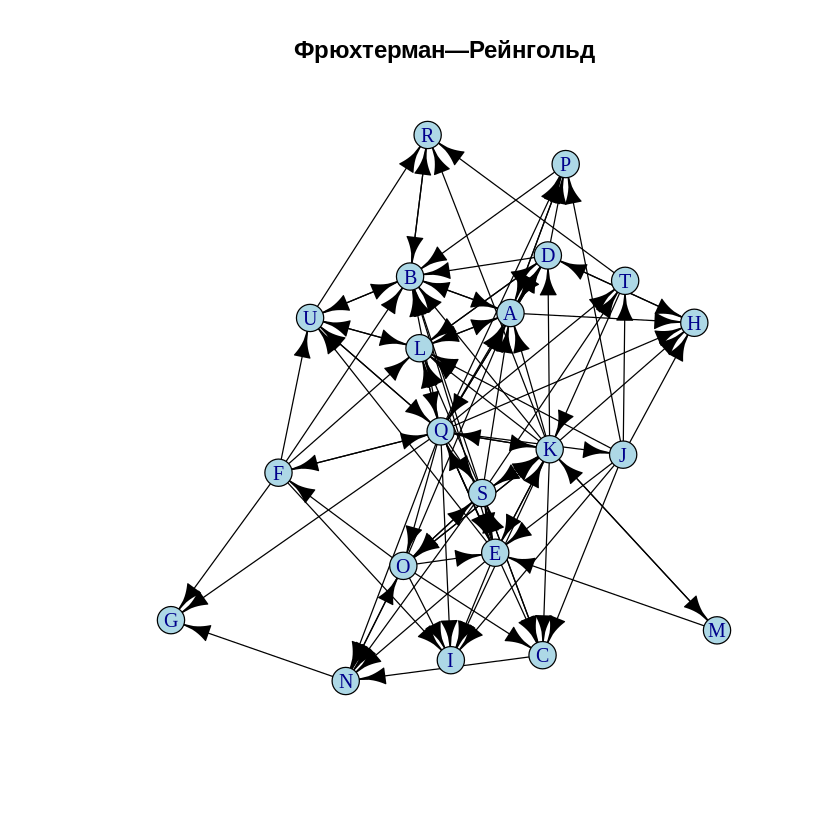

In [141]:
plot(inet, layout = layout_with_fr, vertex.size = 10, vertex.color = "lightblue", edge.color = "black", main = "Фрюхтерман—Рейнгольд")

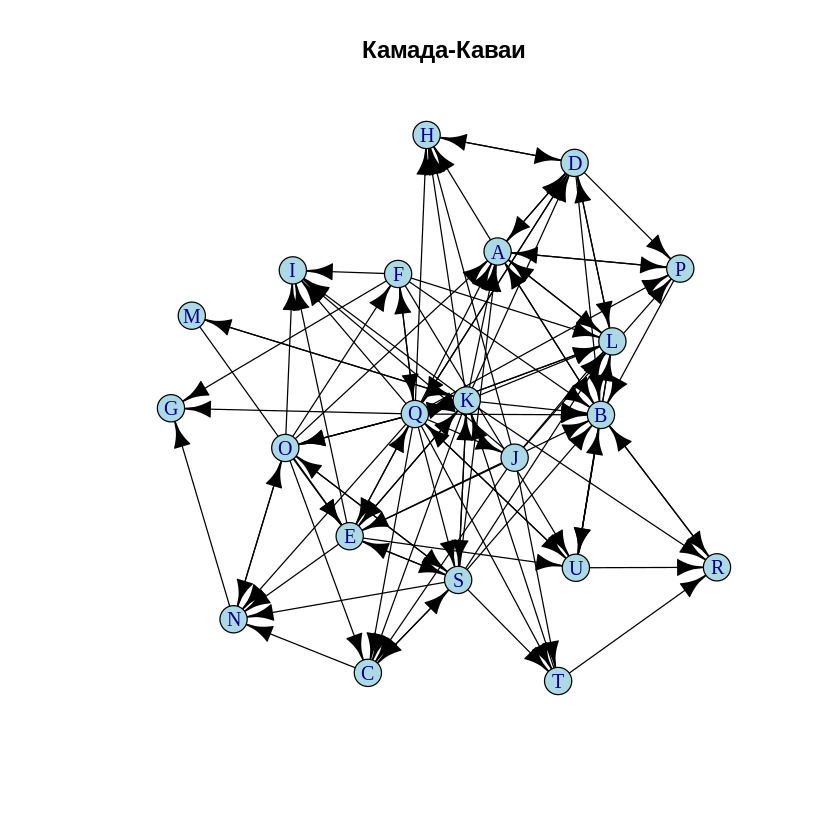

In [142]:
plot(inet, layout = layout_with_kk, vertex.size = 10, vertex.color = "lightblue", edge.color = "black", main = "Камада-Каваи")

In [143]:
summary(inet1)

Network attributes:
  vertices = 21
  directed = TRUE
  hyper = FALSE
  loops = FALSE
  multiple = FALSE
  bipartite = FALSE
 total edges = 102 
   missing edges = 0 
   non-missing edges = 102 
 density = 0.2428571 

Vertex attributes:
  vertex.names:
   character valued attribute
   21 valid vertex names

No edge attributes

Network edgelist matrix:
       [,1] [,2]
  [1,]    2    1
  [2,]    4    1
  [3,]   11    1
  [4,]   12    1
  [5,]   15    1
  [6,]   16    1
  [7,]   17    1
  [8,]   19    1
  [9,]    1    2
 [10,]    4    2
 [11,]    5    2
 [12,]    6    2
 [13,]   11    2
 [14,]   16    2
 [15,]   17    2
 [16,]   18    2
 [17,]   19    2
 [18,]   21    2
 [19,]   10    3
 [20,]   11    3
 [21,]   15    3
 [22,]   17    3
 [23,]   19    3
 [24,]    1    4
 [25,]    8    4
 [26,]   11    4
 [27,]   12    4
 [28,]   17    4
 [29,]   10    5
 [30,]   11    5
 [31,]   13    5
 [32,]   15    5
 [33,]   17    5
 [34,]   19    5
 [35,]   15    6
 [36,]   17    6
 [37,]    6    7


In [144]:
size_nw <- network.size(inet1)
cat("Размер сети:", size_nw, "\n\n")

cat("Плотность сети:\n")
den_g <- ecount(inet) / (size_nw * (size_nw - 1)) # 102/21*20 = 17/70
cat("Вручную по формуле", den_g, "\n")
cat("По функции", gden(inet1), "\n\n")

cat("Число компонент в сети:\n")
cat("По графику невозможно определить\n")
detach("package:igraph", unload = TRUE) # отключение библиотеки графов, чтобы не мешала функции components
cat("По функции", components(inet1), "\n\n")

lgc <- component.largest(inet1, result = "graph")
gd <- geodist(lgc)
cat("Диаметр сети:", max(gd$gdist), "\n\n")

cat("Коэффициент кластеризации:", gtrans(inet1, mode = "graph"))

Размер сети: 21 

Плотность сети:
Вручную по формуле 0.2428571 
По функции 0.2428571 

Число компонент в сети:
По графику невозможно определить
По функции 3 

Диаметр сети: 5 

Коэффициент кластеризации: 0.4610526

In [145]:
# Выводы:
## Плотность - 24,3% от всех возможных связей существуют
# Сеть уже лучше связана, чем в неориентированном варианте, но не слишком плотная
## Число компонент - 3 - сеть не является цельной, а разделена на три группы
# Между компонентами нет связей вообще, некоторые менеджеры вообще не знают друг друга
## Диаметр сети - 5
# Если два менеджера находятся в одной компоненте, они связаны через 5 или менее "рукопожатий", т.е. черех других менеджеров
## Коэффициент кластеризации - 46,1% - средняя способность к дружбе втроем
# То есть если у менеджера есть два соседа, есть такая вероятность, примерно равная выпадению "орла" на монетке, что они связаны друг с другом
# Если у менеджера есть два друга-менеджера, возможно, это превратится в новую серию "Офиса"

###10. Таблица для различных мер престижа

In [146]:
g <- network.size(inet1)

degree_prestige <- degree(inet1, cmode = "indegree") / (g - 1)

closeness_centrality <- igraph::closeness(inet, mode = "in", normalized = FALSE)
I_i <- colSums(igraph::distances(inet, mode = "in") > 0)
closeness_prestige <- closeness_centrality * I_i^2 / (g - 1)

X <- sociomatrix
lambda1 <- ceiling(max(Re(eigen(X)$values))) # наиб. вещ. число социоматрицы X
a <- 1 / lambda1 # параметр затухания
x <- colSums(X)
E <- diag(size_nw)
X_T <- t(X)
left_side <- (1/a) * E - X_T
rang_p <- solve(left_side, x)

# нормировка
m <- 0
for (k in 1:(g-1)) {
  A_k <- factorial(g-1) / factorial(g-1 - k)
  m <- m + (a^k) * A_k
}
rang_prestige <- rang_p / m

data.frame(
  n_i = network.vertex.names(inet1),
  P_D = degree_prestige,
  P_P = closeness_prestige,
  P_R = rang_prestige
)

,n_i,P_D,P_P,P_R
,<chr>,<dbl>,<dbl>,<dbl>
A,A,0.40,0.7142857,3.789183e-05
B,B,0.50,0.7407407,4.187203e-05
C,C,0.25,0.5263158,1.715288e-05
D,D,0.25,0.5882353,2.581405e-05
E,E,0.30,0.5405405,1.840930e-05
F,F,0.10,0.4444444,8.115914e-06
G,G,0.15,0.4444444,1.056874e-05
H,H,0.25,0.5882353,2.188543e-05
I,I,0.30,0.5000000,1.901159e-05


In [147]:
# Лидер сети - B - по всем показателям:
## Престиж по степени (P_D) - 0.50 - связи от половины всех акторов в сети
## Престиж по близости (P_P) - 0.741 - наикратчайшие пути к себе от почти всех других акторов
## Ранговый престиж (P_R) - 4.187e-05 - учитывая авторитетность тех, кто на него ссылается

# Достойные упоминания
## Акторы A (P_D=0.40, P_P=0.714) и L (P_D=0.40, P_P=0.667)

# Наименее престижные аутсайдеры
## J и M (P_D=0.05, P_P=0.37 и 0.4, P_R = 4.79e-06 и 3.81e-06)
## дистанцирован от остальных акторов и имеют наименьший весовой статус в сети

## Выводы

На основе проведенного анализа двух социальных сетей (ненаправленной сети семей и направленной сети менеджеров):

Обе сети характеризуются относительно низкой плотностью связей (16.7% и 24.3% соответственно). Обе сети не являются цельными - флорентийская сеть разделена на 2 компоненты, сеть менеджеров - на 3 компоненты. В каждой сети есть явные лидеры: семья Медичи и актор B. Диаметр обеих сетей равен 5, что означает возможность установления связей между любыми двумя акторами через не более чем 5 "рукопожатий" в одной компоненте. Однако коэффициент кластеризации значительно больше у менеджеров.

В ходе работы были освоены математические пакеты (statnet, igraph) для вычисления описательных характеристик социальных сетей и интерпретации полученных результатов.